In [212]:
import json
import pandas as pd
from datasets import load_from_disk


data = json.load(open('../data/raw/wikipedia_documents.json'))
wiki = pd.DataFrame(data).T

dataset = load_from_disk("../data/raw/train_dataset/")
train_df = pd.DataFrame(dataset['train'])
valid_df = pd.DataFrame(dataset['validation'])

mrc = pd.concat([train_df, valid_df])

wiki.shape, mrc.shape

((60613, 8), (4192, 7))

In [2]:
dataset = load_from_disk("../data/raw/test_dataset/")
dataset
# to pd
test_df = pd.DataFrame(dataset['validation'])
test_df

,question,id
0,유령'은 어느 행성에서 지구로 왔는가?,mrc-1-000653
1,용병회사의 경기가 좋아진 것은 무엇이 끝난 이후부터인가?,mrc-1-001113
2,돌푸스에게 불특정 기간동안 하원이 잠시 쉬는 것을 건의 받았던 인물은?,mrc-0-002191
3,"마오리언어와 영어, 뉴질랜드 수화를 공식 언어로 사용하는 나라는?",mrc-0-003951
4,디엔비엔푸 전투에서 보응우옌잡이 상대한 국가는?,mrc-1-001272
...,...,...
595,타입 2 가이아 메모리을 만든 집단은?,mrc-0-002989
596,장면이 정치보복에 반대하는 입장에서 처벌을 원치 않은 대상은?,mrc-0-001804
597,"콜드게임 중 어떠한 계기로 인해 잠시 중단된 뒤, 익일에 게임이 진행되는 것은?",mrc-0-003411
598,제2캐나다기갑여단이 상륙한 곳은?,mrc-0-003436


In [3]:
mrc.head(1)

,title,context,question,id,answers,document_id,__index_level_0__
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42


In [4]:
mrc['answer_location_ratio'] = mrc.apply(lambda x: (x['answers']['answer_start'][0] / len(x['context']))*100, axis=1)
mrc

,title,context,question,id,answers,document_id,__index_level_0__,answer_location_ratio
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42,27.262181
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873,34.138486
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230,60.000000
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992,85.969739
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548,4.926108
...,...,...,...,...,...,...,...,...
235,전단 (제나라),"연나라 군대의 사령관이 악의에서 기겁으로 교체되자, 전단은 스스로 신령의 계시를 받...",전단이 연나라와의 전쟁에서 승리했을 당시 제나라의 왕은 누구인가?,mrc-0-000484,"{'answer_start': [1084], 'text': ['제 양왕']}",53265,329,86.443381
236,티칼,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...,공놀이 경기장 중 일부는 어디에 위치하고 있나?,mrc-0-002095,"{'answer_start': [343], 'text': [''일곱 개의 신전 광장...",12190,1378,38.238573
237,윤치호,1940년 5월 1일 오전 창씨개명에 비협조적이라는 이유로 조선총독부 경무국에서 소...,창씨개명령의 시행일을 미루는 것을 수락한 인물은?,mrc-0-003083,"{'answer_start': [247], 'text': ['미나미 지로']}",5326,2031,18.797565
238,신잉카국,빌카밤바 지역은 파차쿠티 황제 때 부터 잉카 제국에 속해있던 지역이었다. 스페인 군...,망코 잉카가 쿠스코를 되찾기 위해 마련한 군사는 총 몇 명인가?,mrc-0-002978,"{'answer_start': [563], 'text': ['200,000명']}",48575,1963,56.412826


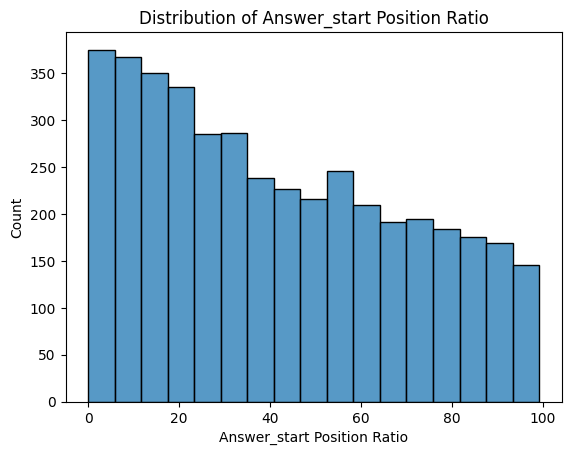

In [5]:
# visualize the distribution of answer location ratio

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(mrc['answer_location_ratio'])
plt.title('Distribution of Answer_start Position Ratio')
x = plt.xlabel('Answer_start Position Ratio')
plt.show()


In [6]:
mrc_sorted = mrc.sort_values(by='answer_location_ratio', ascending=False)
mrc_sorted.head(1)

,title,context,question,id,answers,document_id,__index_level_0__,answer_location_ratio
2749,이연희 (종교인),이연희는 순교자 남명혁 다미아노의 부인이다. 그녀는 매우 강한 의지를 가진 매우 영...,남명혁 부인의 사망 당시 나이는?,mrc-0-002123,"{'answer_start': [708], 'text': ['36세']}",39032,1394,99.159664


In [7]:
mrc_sorted['context'].iloc[0]

'이연희는 순교자 남명혁 다미아노의 부인이다. 그녀는 매우 강한 의지를 가진 매우 영리한 여성이었다. 그녀도 권희 바르바라와 마찬가지로 당시의 위험을 무릅쓰고 앵베르 주교와 선교사들을 기꺼이 받아들여 그들에게 숙식을 제공했다. 사람들이 그녀의 집에 모여들면, 그녀는 그들을 돌보며 가르쳤고 그들이 성사를 볼 수 있도록 도왔다. 그녀의 친절과 겸손은 주위의 모든 사람들을 기쁘게 하였다.\\n\\n1839년에 그녀가 체포되었을 때, 그녀는 36세였다. 감옥에서 그녀는 형졸들에게 고문 받았다. 그녀가 그들의 무례함을 꾸짖자, 남편 남명혁은 그녀에게 천주교 신자는 순한 양처럼 죽어야 한다고 충고하였다. 그 후 그녀는 어떠한 학대나 잔혹 행위라도 불평없이 견뎠다.\\n\\n그녀의 12살 된 아들이 다른 옥방에 갖혀 있었는데, 형졸들은 그를 고문하며 그녀가 아들의 비명을 들을 수 있도록 했다. 형졸들은 그녀에게 아이가 어떻게 고문 받는지를 말해주었다. 그녀는 행여나 아들이 고문에 굴복하여 자신의 신앙을 버릴까 염려하였지만, 모든 시련은 하느님의 가장 위대한 영광을 위한 것이라고 말하며 스스로를 안심시켰다. 그녀는 가혹한 형벌과 고문을 받으면서도 마음 속 깊은 곳에서부터 하느님을 사랑하며 자신이 원하는 것은 오직 천국 뿐이라고 증언하였다.\\n\\n그녀는 1839년 9월 3일에 서소문 밖에서 다섯 명의 교우와 함께 참수 되었다. 그녀가 신앙을 위하여 목숨을 바쳤을 때 나이 36세였다.'

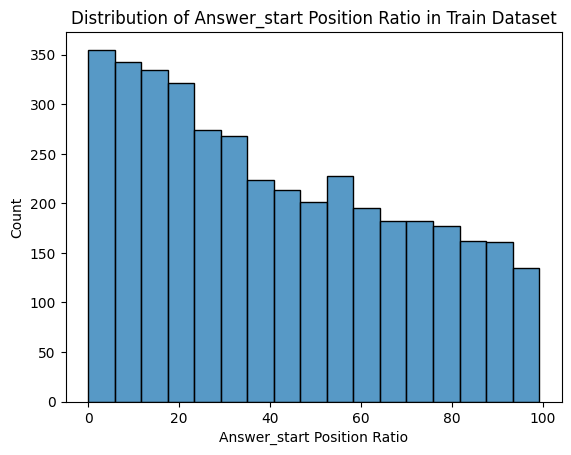

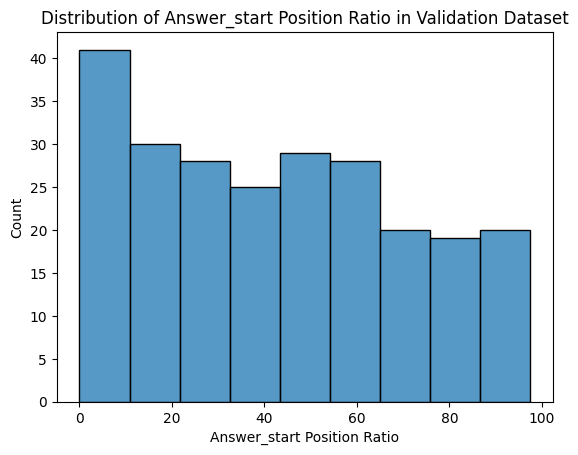

In [8]:
train_df['answer_location_ratio'] = train_df.apply(lambda x: (x['answers']['answer_start'][0] / len(x['context']))*100, axis=1)
valid_df['answer_location_ratio'] = valid_df.apply(lambda x: (x['answers']['answer_start'][0] / len(x['context']))*100, axis=1)
sns.histplot(train_df['answer_location_ratio'])
plt.title('Distribution of Answer_start Position Ratio in Train Dataset')
x = plt.xlabel('Answer_start Position Ratio')
plt.show()

sns.histplot(valid_df['answer_location_ratio'])
plt.title('Distribution of Answer_start Position Ratio in Validation Dataset')
x = plt.xlabel('Answer_start Position Ratio')
plt.show()

In [9]:
mrc['context_length'] = mrc['context'].apply(lambda x: len(x))
mrc['question_length'] = mrc['question'].apply(lambda x: len(x))
mrc['context_length'].describe()

count    4192.000000
mean      920.020515
std       356.661266
min       512.000000
25%       643.000000
50%       819.000000
75%      1100.250000
max      2064.000000
Name: context_length, dtype: float64

In [10]:
mrc['question_length'].describe()

count    4192.000000
mean       29.315124
std         8.726480
min         8.000000
25%        23.000000
50%        29.000000
75%        35.000000
max        78.000000
Name: question_length, dtype: float64

In [152]:
import re
from tqdm import tqdm
tqdm.pandas()  # tqdm을 pandas와 함께 사용 가능하게 설정

def check_line_breaks(text):
    print(repr(text))
    
def sentence_split(text):
    # 간단한 문장 단위 분리 함수 (구두점 기준으로 문장을 분리)
    sentences = re.split(r'(?<=[.!?])\s+|\n+|\\n+|\xa0+|。', text)
    
    return sentences

def check_token_length(wiki, tokenizer, max_seq_length):
    """
    문서를 토큰화하고, 각 문서의 가장 긴 문장 토큰 길이를 계산하여,
    max_seq_length를 초과하는 문서를 필터링하고 정렬된 결과를 반환하는 함수.

    Parameters:
    wiki (pd.DataFrame): 텍스트가 포함된 데이터프레임
    tokenizer: 문장을 토큰화하는 tokenizer 객체
    max_seq_length (int): 최대 시퀀스 길이

    Returns:
    pd.DataFrame: max_seq_length를 초과하는 긴 문장이 포함된 문서들
    """
    wiki = wiki.copy()
    wiki['context_sentences'] = wiki['text'].progress_apply(lambda x: sentence_split(x))
    wiki['context_sentences_token_len_max'] = wiki['context_sentences'].progress_apply(lambda x: max([len(tokenizer.tokenize(sentence)) for sentence in x]))
    print(wiki['context_sentences_token_len_max'].describe())
    wiki_long = wiki[wiki['context_sentences_token_len_max'] > max_seq_length]
    wiki_long = wiki_long.sort_values(by='context_sentences_token_len_max', ascending=False)
    
    return wiki_long

def see_long_sentence(wiki_long, tokenizer, idx):
    sentences = []
    print(wiki_long['context_sentences_token_len_max'].iloc[idx])
    for sentence in wiki_long['context_sentences'].iloc[idx]:
        if len(tokenizer.tokenize(sentence)) > max_seq_length:
            check_line_breaks(sentence)
            print('*'*100)
            print(tokenizer.tokenize(sentence))
            print('*'*100)
            print(sentence)
            sentences.append(sentence)
    return sentences
    
    # print(wiki_long['context_sentences'].iloc[idx])

In [153]:
from sentence_transformers import SentenceTransformer

model_name = "nlpai-lab/KoE5"
model = SentenceTransformer(
    model_name_or_path=model_name, 
    )
tokenizer = model.tokenizer
max_seq_length = min(model.max_seq_length, model[0].auto_model.config.max_position_embeddings)  # 최대 시퀀스 길이

wiki_long = check_token_length(wiki, tokenizer, max_seq_length)
wiki_long.shape

100%|██████████| 60613/60613 [01:47<00:00, 563.43it/s]


count    60613.000000
mean        77.470361
std         39.855717
min          4.000000
25%         55.000000
50%         69.000000
75%         90.000000
max       1426.000000
Name: context_sentences_token_len_max, dtype: float64


(18, 13)

In [140]:
print(ord('。'))
print(ord('。'))

s = '수번뇌(隨煩惱)|ps"復次隨煩惱者。謂貪不善根。瞋不善根。癡不善根。若忿若恨。如是廣說諸雜穢事。當知此中能起一切不善法貪。名貪不善根。瞋癡亦爾。若瞋恚纏能令面貌慘裂奮發。說名為忿。'
print(sentence_split(s))
s = '또한 직접 불교 경전 20권을 짓기도 했는데, 당시 석총(釋總)이라는 승려가 이 불경을 보고 "하나같이 요사스러운 말로서 입에 담기도 어렵다"고 혹평했고, 궁예는 석총을 철퇴로 패 죽이고 말았다.\\n이 외에도 917년에 선종 계열의 승려로, 후백제 지역에서 건너와 활동했던 형미도 궁예에게 죽임을 당했다고 전해져, 궁예가 억지스러운 불교 경전들을 짓고, 미륵으로 행세하는 식의, 정통 불교 교리를 근본적으로 파괴하는 억지스러운 자기 신격화를 추진하는 것에 대해 불교계가 거센 반발을 하고 있음을 알 수 있고, 또 유학자들의 경우도 본래 궁예의 최측근이였다가 궁예에게 죽을뻔한 왕건을 살려준 후, 궁예를 등지고 왕건의 최측근이 된 유학자 최응과 궁예 정권 시절 궁예의 태자인 청광보살의 사부의 벼슬이였던 동궁기실로 있다가 궁예의 왕비 강씨와 강씨의 두 아들이 처형된 전후에 궁을 탈출해 승려가 되었다가, 역시 왕건의 집권 후 돌아와 왕건의 신료가 되어 왕건에게 최초로 왕씨 성을 하사받은 왕유(본명 박유.)의 경우와 궁예가 몰락한 해인 918년 3월, 왕창근이 한 기이한 노인에게서 얻은 거울에 적힌 왕건이 궁예를 멸망시킨후 삼한을 통일하고 더 나아가 압록강까지 수복한다는 내용의 은어로 된 글들을 해석한후, 왕건과 자신들의 안전을 위해 거짓으로 꾸며서 왕건을 위기에서 구했다는 궁예의 문인들이였던 송함홍,백탁,허원 등의 경우들을 봐도, 대개의 유학자들과 유학 계열의 문인들 역시, 자신을 신으로 여기면서, 사람들에게 자신을 신격화시키고 신으로서의 숭배를 강요하는 궁예의 행동들에 반감을 가지고 있었음을 짐작할 수 있다.\\n\\n수덕만세 3년(913년) 왕건을 파진찬 겸 문하시중으로 임명해 수도로 불러들인지 1년만인 정개 원년(914년)에, 견훤이 나주를 공략해 오자 "수군의 장수가 지위가 미천해서 위엄을 널리 보일 수 없다."며 다시 왕건을 시중에서 해임하고 백선장군으로 삼아 나주로 내려 보냈다.'
print(sentence_split(s))
print(len(sentence_split(s)))
s = re.split(r'(?<=[.!?])\s+|\n+|\\n+|\xa0+|。', s)
print(s)
print(len(s))


12290
12290
['수번뇌(隨煩惱)|ps"復次隨煩惱者', '謂貪不善根', '瞋不善根', '癡不善根', '若忿若恨', '如是廣說諸雜穢事', '當知此中能起一切不善法貪', '名貪不善根', '瞋癡亦爾', '若瞋恚纏能令面貌慘裂奮發', '說名為忿', '']
['또한 직접 불교 경전 20권을 짓기도 했는데, 당시 석총(釋總)이라는 승려가 이 불경을 보고 "하나같이 요사스러운 말로서 입에 담기도 어렵다"고 혹평했고, 궁예는 석총을 철퇴로 패 죽이고 말았다.\\n이 외에도 917년에 선종 계열의 승려로, 후백제 지역에서 건너와 활동했던 형미도 궁예에게 죽임을 당했다고 전해져, 궁예가 억지스러운 불교 경전들을 짓고, 미륵으로 행세하는 식의, 정통 불교 교리를 근본적으로 파괴하는 억지스러운 자기 신격화를 추진하는 것에 대해 불교계가 거센 반발을 하고 있음을 알 수 있고, 또 유학자들의 경우도 본래 궁예의 최측근이였다가 궁예에게 죽을뻔한 왕건을 살려준 후, 궁예를 등지고 왕건의 최측근이 된 유학자 최응과 궁예 정권 시절 궁예의 태자인 청광보살의 사부의 벼슬이였던 동궁기실로 있다가 궁예의 왕비 강씨와 강씨의 두 아들이 처형된 전후에 궁을 탈출해 승려가 되었다가, 역시 왕건의 집권 후 돌아와 왕건의 신료가 되어 왕건에게 최초로 왕씨 성을 하사받은 왕유(본명 박유.)의 경우와 궁예가 몰락한 해인 918년 3월, 왕창근이 한 기이한 노인에게서 얻은 거울에 적힌 왕건이 궁예를 멸망시킨후 삼한을 통일하고 더 나아가 압록강까지 수복한다는 내용의 은어로 된 글들을 해석한후, 왕건과 자신들의 안전을 위해 거짓으로 꾸며서 왕건을 위기에서 구했다는 궁예의 문인들이였던 송함홍,백탁,허원 등의 경우들을 봐도, 대개의 유학자들과 유학 계열의 문인들 역시, 자신을 신으로 여기면서, 사람들에게 자신을 신격화시키고 신으로서의 숭배를 강요하는 궁예의 행동들에 반감을 가지고 있었음을 짐작할 수 있다.\\n\\n수덕만세 3년(913년) 왕건을 파진찬 겸 문하시중으로 임명해 수도로 불러들인지 1년만인 정개 원년(

In [154]:
x = 1
ss = see_long_sentence(wiki_long, tokenizer, x)
print(f'ss: {len(ss)}')
# s = ss[0]
# print(sentence_split(s))

1247
'[光州長澤縣人從恭愍入元宿衛累官大護軍王卽位錄其功爲1等與金鏞有寵於王楊廣道按廉金南得笞辱忽赤中郞將鄭谷谷同僚權石和等訴於王世雲鏞與南得善請王杖流石和等于海島又與鏞忌密直副使任君輔有寵讒以詐傳王旨流濟州歷軍簿判書知門下省事錄誅奇轍功爲一等八年紅賊陷西京以世雲爲西北面都巡察使自黃州還言賊入西京積柴修城無進逼計願勿驚擾以安衆心轉參知政事倭寇楊廣道京城戒嚴令百官從軍諫官詣王宮辭世雲曰諫官從軍古所未聞如國體何命免之十年紅賊陷京城王幸福州世雲以樞密兼鷹揚軍上將軍從行性忠淸日夜憂憤以掃賊恢復自任王亦倚信世雲屢請亟下哀痛之敎以慰民心遣使督諸道兵討賊王遂以世雲爲摠兵官敎曰天下安注意相天下危注意將惟時與勢輕重在人可不愼哉恭惟太祖肇創鴻業列聖相承休養生民逮于寡人狃于宴安軍旅之事廢而不講以致紅賊侵犯播越而南每念宗社痛楚何堪今分遣諸將合兵攻賊乃授鄭世雲節鉞往董厥師賞罰用命不用命其各處軍官軍人敢有故遼節制及隔越馳聞者聽以軍法從事於戱師出以律有國之所當先國耳忘家爲臣之所當急惟爾士衆體予至懷世雲詣都堂憤然揚言曰吾甚寒徵如吾爲相國家宜亂竹嶺以南居人扈駕者不給糧幷從事此議已定今何不然紀綱乃爾安能制難謂柳淑曰吾明日出師公其往簽軍淑曰諸軍已到竹嶺大院矣世雲曰軍若後期公亦不得免責淑卽往督之又謂鏞曰今兩相玩寇如此孰不效耶若不殲賊縱竄匿山谷可得而生可得而國乎守侍中李嵓曰今寇賊闌人君臣播遷爲天下之笑三韓之恥而公首倡大義仗鉞行師社稷之再安王業之中興在此一擧惟公勉之吾君臣日夜望公之凱還也世雲行擢授中書平章事位二相三宰之間王遣塢達赤權天祐賜衣酒世雲附奏曰諸將有報獲賊者勿先論賞臣雖捕獲不敢數馳報以煩驛騎大戰之後具狀上聞西京人高敬至軍前言府民脫賊者無慮萬人請遣將鎭撫世雲大悅遣禮部尙書李珣往撫之督赴京城十一年世雲督諸將圍京城自退屯兜率院賊平遣大將軍金漢貴中郞將金景奉露布詣行在曰嘗軫濟世之心旁求俊彦敬承分閫之命恐累聖明竊聞興衰有數理亂無窮安民之要禦寇爲難太王去邠未能防狄人之逼明皇幸蜀不得制獦狗之侵掃赤眉而劉漢重興破黃巾而曹魏繼統薛悉惟時軍匪獨人爲當去歲之仲冬値滔天之勍敵論其肆毒雖豺虎之莫如觀其行兵亦孫吳之難抗日將自恣世無誰何乘勝長驅旣橫行於天下遠引直入遂大振於海東怒鋒不可當望風皆自潰百萬精甲奄屯住於都城億兆斯民蕩流離於道路嗟哉黎烝甚於塗炭況乘輿之遠狩實將相之深憂肆擧雲合之兵遂攻蟻聚之虜士卒得建瓴之勢赴敵何難頑嚚爲

In [156]:
wiki.columns

Index(['text', 'corpus_source', 'url', 'domain', 'title', 'author', 'html',
       'document_id', 'context_sentences', 'context_sentences_len_max',
       'context_sentences2', 'context_sentences2_len_max'],
      dtype='object')

In [207]:
wiki_processed = wiki.copy()
except_idx = []

In [208]:
def find_string_in_text(df, search_string):
    return df[df['text'].str.contains(search_string, na=False, regex=False)].index


In [279]:
s = '같은 시기에 사용된 다른 연호로는 동진(東晉)에서 사용한 융안(隆安 : 397년 ~ 401년), 원흥(元興 : 402년 ~ 404년), 대형(大亨 : 402년 ~ 403년), 의희(義熙 : 405년 ~ 418년), 환현(桓玄)의 초(楚)에서 사용한 건시(建始 : 403년), 영시(永始 : 403년 ~ 404년), 후연(後燕)에서 사용한 장락(長樂 : 399년 ~ 401년), 광시(光始 : 401년 ~ 406년), 건시(建始 : 407년), 서진(西秦)에서 사용한 태초(太初 : 388년 ~ 400년), 경시(更始 : 409년 ~ 412년), 영강(永康 : 412년 ~ 419년), 후량(後凉)에서 사용한 용비(龍飛 : 396년 ~ 399년), 함녕(咸寧 : 399년 ~ 401년), 신정(神鼎 : 401년 ~ 403년), 북량(北凉)에서 사용한 천새(天璽 : 399년 ~ 401년), 영안(永安 : 401년 ~ 412년), 현시(玄始 : 412년 ~ 428년), 남량(南凉)에서 사용한 태초(太初 : 397년 ~ 399년), 건화(建和 : 400년 ~ 402년), 홍창(弘昌 : 402년 ~ 404년), 가평(嘉平 : 408년 ~ 414년), 남연(南燕)에서 사용한 건평(建平 : 400년 ~ 405년), 태상(太上 : 405년 ~ 410년), 서량(西凉)에서 사용한 경자(庚子 : 400년 ~ 404년), 건초(建初 : 405년 ~ 417년), 하(夏)에서 사용한 용승(龍昇 : 407년 ~ 413년), 봉상(鳳翔 : 413년 ~ 418년), 북연(北燕)에서 사용한 정시(正始 : 407년 ~ 409년), 태평(太平 : 409년 ~ 430년), 북위(北魏)에서 사용한 천흥(天興 : 398년 ~ 404년), 천사(天賜 : 404년 ~ 409년), 영흥(永興 : 409년 ~ 413년), 신서(神瑞 : 414년 ~ 416년)가 있다.'
s = '같은 시기에 사용된 다른 연호로는 동진(東晉)에서 사용한 융안(隆安 : 397년 ~ 401년), 원흥(元興 : 402년 ~ 404년), 대형(大亨 : 402년 ~ 403년), 의희(義熙 : 405년 ~ 418년), 환현(桓玄)의 초(楚)에서 사용한 건시(建始 : 403년), 영시(永始 : 403년 ~ 404년), 후진(後秦)에서 사용한 홍시(弘始 : 399년 ~ 416년), 후량(後凉)에서 사용한 신정(神鼎 : 401년 ~ 403년), 북량(北凉)에서 사용한 영안(永安 : 401년 ~ 412년), 남량(南凉)에서 사용한 건화(建和 : 400년 ~ 402년), 홍창(弘昌 : 402년 ~ 404년), 남연(南燕)에서 사용한 건평(建平 : 400년 ~ 405년), 태상(太上 : 405년 ~ 410년), 서량(西凉)에서 사용한 경자(庚子 : 400년 ~ 404년), 건초(建初 : 405년 ~ 417년), 북위(北魏)에서 사용한 천흥(天興 : 398년 ~ 404년), 천사(天賜 : 404년 ~ 409년)가 있다.'
tokenized = tokenizer.tokenize(s)
print(len(tokenized))
s = sentence_split(s)
print(s)
for x in s:
    tokenized = tokenizer.tokenize(x)
    print(len(tokenized))

586
['같은 시기에 사용된 다른 연호로는 동진(東晉)에서 사용한 융안(隆安 : 397년 ~ 401년), 원흥(元興 : 402년 ~ 404년), 대형(大亨 : 402년 ~ 403년), 의희(義熙 : 405년 ~ 418년), 환현(桓玄)의 초(楚)에서 사용한 건시(建始 : 403년), 영시(永始 : 403년 ~ 404년), 후연(後燕)에서 사용한 장락(長樂 : 399년 ~ 401년), 광시(光始 : 401년 ~ 406년), 건시(建始 : 407년), 서진(西秦)에서 사용한 태초(太初 : 388년 ~ 400년), 경시(更始 : 409년 ~ 412년), 영강(永康 : 412년 ~ 419년), 후량(後凉)에서 사용한 용비(龍飛 : 396년 ~ 399년), 함녕(咸寧 : 399년 ~ 401년), 신정(神鼎 : 401년 ~ 403년), 북량(北凉)에서 사용한 천새(天璽 : 399년 ~ 401년), 영안(永安 : 401년 ~ 412년), 현시(玄始 : 412년 ~ 428년), 남량(南凉)에서 사용한 태초(太初 : 397년 ~ 399년), 건화(建和 : 400년 ~ 402년), 홍창(弘昌 : 402년 ~ 404년), 가평(嘉平 : 408년 ~ 414년), 남연(南燕)에서 사용한 건평(建平 : 400년 ~ 405년), 태상(太上 : 405년 ~ 410년), 서량(西凉)에서 사용한 경자(庚子 : 400년 ~ 404년), 건초(建初 : 405년 ~ 417년), 하(夏)에서 사용한 용승(龍昇 : 407년 ~ 413년), 봉상(鳳翔 : 413년 ~ 418년), 북연(北燕)에서 사용한 정시(正始 : 407년 ~ 409년), 태평(太平 : 409년 ~ 430년), 북위(北魏)에서 사용한 천흥(天興 : 398년 ~ 404년), 천사(天賜 : 404년 ~ 409년), 영흥(永興 : 409년 ~ 413년), 신서(神瑞 : 414년 ~ 416년)가 있다.']
586


In [347]:
i = 0
text = '제1편인 설회인유편(設會因由篇)부터 엄정팔방편(嚴淨八方篇), 주향통서편(呪香通序篇), 주향공양편(呪香供養'
index = find_string_in_text(wiki, text)
# wiki_processed.loc[index, 'text'] = wiki_processed.loc[index, 'text'].str.replace('.', '. ', regex=False)
# wiki_processed.loc[index[0], 'text'] = wiki_processed['text'].iloc[int(index[i])].split('<정세운(鄭世雲)>')[0] + text
print(f'index: {index}')
print('*'*100)
print(wiki.iloc[int(index[i])]['text'])
print('*'*100)
print(wiki_processed.iloc[int(index[i])]['text'])
print('*'*100)

print()
print('check long sentence:')
splited = sentence_split(wiki_processed.iloc[int(index[i])]['text'])
flag = False
for s in splited:
    tokenized = tokenizer.tokenize(s)
    # print(f'{len(tokenized)} : {s}')
    if len(tokenized) > max_seq_length:
        print(f'{len(tokenized)} : {s}')
        flag = True
if not flag:
    print('no long sentence')

index: Index(['44414'], dtype='object')
****************************************************************************************************
『천지명양수륙재의찬요(天地冥陽水陸齋纂要)』는 물과 땅에서 죽은 고혼(孤魂)들을 달래기 위한 수륙재(水陸齋)의 의식차를 요약한 의례서이다. 보통 『중례문(中禮文)』이라고 한다. 수륙재는 양(梁)나라 무제(武帝) 때인 6세기 초반부터 시작되었고, 송나라 희령연간(熙寧年間)에 동천(東川)이 『수륙문(水陸文)』 3권을 지어 보급함으로써 크게 성행하였다. 우리나라에서도 970년(고려 종 21)에 갈양사(葛陽寺)에서 개설된 이후 조선시에도 진관사(津寬寺)를 중심으로 계속되었다.  

이 책은 1593년(선조 26)에 전라도 담양(潭陽)의 용천사(龍泉寺)에서 간행한 목판본으로 모두 54편이 수록되어 있다. 제1편인 설회인유편(設會因由篇)부터 엄정팔방편(嚴淨八方篇), 주향통서편(呪香通序篇), 주향공양편(呪香供養{篇), 소청사[자편](召請使[者篇]), 안위공양편 제6(安位供養篇 第六), 봉[송사자편](奉[送使者篇]), 개벽오방편(開闢五方篇), 안위공양편 제9, 소청상위편(召請上位篇), 봉영부욕편 제11(奉迎赴浴篇 第十一), 찬탄관욕편(讚歎灌浴篇), 인성귀위편(引聖歸位位篇), 헌좌안위편 제14(獻座安危篇 第十四), 찬례삼보편(讚禮三寶篇), 소청중위편(召請中位篇), 봉영부욕 제17, 가지조욕편 제18(加持澡浴篇 第十八), 출욕참성편 제19(出浴參聖篇 第十九), 천선예성편(天仙禮聖篇), 헌좌안위편 제21, 소청하위편(召請下位篇), 인예향욕편(引詣香浴篇), 가지조욕편 제24, 가지화의편(加持化衣篇), 수의복식편(授衣服飾篇), 출욕참성편 제27, 고혼예성편(孤魂禮聖篇), 수위안좌편(受位安座篇), 기성가지편(祈聖加持篇), 보신배헌편(普伸拜獻篇), 공성회향편(供聖廻向篇), 선밀가지편(宣蜜加持篇), 가지멸죄편(加持滅罪篇), 주식현절편(呪食現切

In [341]:
'''실제 processing code'''


def find_string_in_text(df, search_string):
    return df[df['text'].str.contains(search_string, na=False, regex=False)].index


,text,corpus_source,url,domain,title,author,html,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,None,나라 목록,None,None,0
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,None,나라 목록,None,None,1
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,None,백남준,None,None,2
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,None,아오조라 문고,None,None,3
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,None,아오조라 문고,None,None,4
...,...,...,...,...,...,...,...,...
60608,"오키나와 현립 박물관·미술관( , Okinawa Prefectural Museum ...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60608
60609,"1936년 7월, 오키나와현 교육위원회 부설 향토 박물관(沖縄県教育会附設郷土博物館)...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60609
60610,박물관은 개관 10주년이되는 2017년에 관의 애칭 및 마스코트를 일반인에게 공모했...,위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60610
60611,단결권 및 단체교섭권 협약(Right to Organise and Collectiv...,위키피디아,None,None,단결권 및 단체교섭권 협약,None,None,60611


In [ ]:
# wiki_processed = wiki.copy()
# text = '실제로 2020년 3월 5일 현재까지 단리된 SARS-CoV-2 균주 57개 중, 2019년 3월 5일 현재 단리 일시와 장소를 알 수 없는 UNKNOWN-LR757996 균주(Strain) , SARS-CoV-2/Hu/DP/Kng/19-027 균주 ; 2019년 12월 중국에서 단리된 Wuhan-Hu-1 균주 ; 2019년 12월 23일 최초로 중국에서 단리된 BetaCoV/Wuhan/IPBCAMS-WH-01/2019 균주 ; 2019년 12월 30일 중국에서 단리된 BetaCoV/Wuhan/IPBCAMS-WH-02/2019 균주 , '
# index = find_string_in_text(wiki, text)
# wiki_processed.loc[index, 'text'] = wiki_processed.loc[index, 'text'].str.replace(';', '.', regex=False)

# text = '<정세운(鄭世雲)>'
# index = find_string_in_text(wiki, text)
# wiki_processed.loc[index[0], 'text'] = wiki_processed['text'].iloc[int(index[0])].split('<정세운(鄭世雲)>')[0] + text

# text = '관직으로는 종친부(宗親府)의 군(君)·종정경(宗正卿), 충훈부'
# index = find_string_in_text(wiki, text)
# wiki_processed.loc[index, 'text'] = wiki_processed.loc[index, 'text'].str.replace('·', '. ', regex=False)

# text = '2003년 ≪또야 너구리가 기운 바지를 입었어요≫(KBS 프로 [TV 책을 말하다] 좋은 어린이 책) ≪수업을 왜 하지?≫(문화관광부 추천도서) ≪땅콩 선생, 드디어'
# index = find_string_in_text(wiki, text)
# wiki_processed.loc[index, 'text'] = wiki_processed.loc[index, 'text'].str.replace('도서)', '도서). ', regex=False)

# text = '과학기술과 전쟁(크레펠트), 군대 명령과 복종(니코 케이저), 군대문화 이야기(양희완), 군대와 사회(온만금), 군사사상론(군사학연구회), 군사전략입문(에체베리아), 군인(슈나이더), 군인과 국가(헌팅턴), 극한의 경험(유발 하라리), 근대국가와 전쟁(박상섭),'
# index = find_string_in_text(wiki, text)
# wiki_processed.loc[index, 'text'] = wiki_processed.loc[index, 'text'].str.replace('),', ').', regex=False)

# text = '조선 개국 후 개국원종공신(開國原從功臣)이 되어 내사사인(內史舍人), 병조의랑(兵曹議郞), 세자우필선(世子右弼善), 사헌부 중승(司憲府 中丞), 판교서(判校書)'
# index = find_string_in_text(wiki, text)
# wiki_processed.loc[index, 'text'] = wiki_processed.loc[index, 'text'].str.replace(',', '.', regex=False)

# text = '제1편인 설회인유편(設會因由篇)부터 엄정팔방편(嚴淨八方篇), 주향통서편(呪香通序篇'
# index = find_string_in_text(wiki, text)
# wiki_processed.loc[index, 'text'] = wiki_processed.loc[index, 'text'].str.replace(',', '.', regex=False)

# text = '같은 시기에 사용된 다른 연호로는 동진(東晉)에서 사용한 융안(隆安 : 397년 ~ 401년), 원흥(元興 : 402년 ~ 404년), 대형'
# index = find_string_in_text(wiki, text)
# wiki_processed.loc[index, 'text'] = wiki_processed.loc[index, 'text'].str.replace(',', '.', regex=False)

# text = '곡룡류인 아노돈토사우루스(Anodontosaurus lambei), 에드몬토니아(Edmontoni'
# index = find_string_in_text(wiki, text)
# wiki_processed.loc[index, 'text'] = wiki_processed.loc[index, 'text'].str.replace(',', '.', regex=False)

# text = '같은 시기에 사용된 다른 연호로는 동진(東晉)에서 사용한 의희(義熙 : 405년 ~ 418년), 원희(原熙 : 419년 ~ 420년), 후진(後秦)에서 사용'
# index = find_string_in_text(wiki, text)
# wiki_processed.loc[index, 'text'] = wiki_processed.loc[index, 'text'].str.replace(',', '.', regex=False)

# text = '주화산(금남정맥 분리)-모래재-곰티(익산포항고속국도 통과)-슬치(순천완주고속국도, 국도 제17호선, 전라선 철도 통과)-갈미봉(540m)'
# index = find_string_in_text(wiki, text)
# wiki_processed.loc[index, 'text'] = wiki_processed.loc[index, 'text'].str.replace('-', '. ', regex=False)

# text = '《일본서기》(日本書紀)에는 덴무 천황 13년인 서기 684년'
# index = find_string_in_text(wiki, text)
# wiki_processed.loc[index, 'text'] = wiki_processed.loc[index, 'text'].str.replace('、', '. ', regex=False)

# text = '이와 더불어  故 고우영 작가의 만화를 원작으로 한  애니메이션 《삼국지》'
# index = find_string_in_text(wiki, text)
# wiki_processed.loc[index, 'text'] = wiki_processed.loc[index, 'text'].str.replace('》', '. ', regex=False)

# text = '재미 한인사회 간에 주미외교위원부 문제를 중심으로 분규가 자못 심함으로 1944년 5월 15일 국무회의에서 정·부주석과 외무,'
# index = find_string_in_text(wiki, text)
# wiki_processed.loc[index, 'text'] = wiki_processed.loc[index, 'text'].str.replace('하야', '하야. ', regex=False)

# text = '또한 궁예가 지향했던 불교와 석총의 불교가 같은 법상종 계열이면서도 궁예는 아미타불, 관음보살 중심이었던 데 반해서 석총은 미륵보살'
# index = find_string_in_text(wiki, text)
# wiki_processed.loc[index, 'text'] = wiki_processed.loc[index, 'text'].str.replace('가만히 보고 있을 수 없었을 것이고,', '가만히 보고 있을 수 없었을 것이고. ', regex=False)

# text = '스카웃은 게임에서 정말 빠른 클래스이지만, 데미지를 주고 받는게 힘들다.스카웃은 마름쇠로 장전하고 발사하는 못총과 스턴을 멈추고 적을'
# index = find_string_in_text(wiki, text)
# wiki_processed.loc[index, 'text'] = wiki_processed.loc[index, 'text'].str.replace('.', '. ', regex=False)

# text = '구단주는 우장룡총경리가 담당했다《연변직업축구의 어버이》'
# index = find_string_in_text(wiki, text)
# wiki_processed.loc[index, 'text'] = wiki_processed.loc[index, 'text'].str.replace('.', '. ', regex=False)

In [377]:
# load wikipedia_documents_processed.json
wiki_processed = pd.read_json('../data/preprocessed/wikipedia_documents_processed.json', orient='index')

from sentence_transformers import SentenceTransformer

model_name = "nlpai-lab/KoE5"
model = SentenceTransformer(
    model_name_or_path=model_name, 
    )
tokenizer = model.tokenizer
max_seq_length = min(model.max_seq_length, model[0].auto_model.config.max_position_embeddings)  # 최대 시퀀스 길이

In [378]:
df = check_token_length(wiki_processed, tokenizer, max_seq_length)
df

100%|██████████| 56808/56808 [01:40<00:00, 567.74it/s]


count    56808.000000
mean        78.424271
std         37.887338
min          7.000000
25%         56.000000
50%         70.000000
75%         91.000000
max        507.000000
Name: context_sentences_token_len_max, dtype: float64


,text,corpus_source,url,domain,title,author,html,document_id,context_sentences,context_sentences_token_len_max


In [376]:
df.shape

(0, 10)

In [371]:
x = 1
ss = see_long_sentence(df, tokenizer, x)
print(f'ss: {len(ss)}')
# s = ss[0]
# print(sentence_split(s))

570
'《일본서기》(日本書紀)에는 덴무 천황 13년인 서기 684년 음력 11월 1일에 처음으로 아손을 하사받은 52개의 우지로써 오미와 씨(大三輪氏)、오카스가 씨(大春日氏)、아베 씨(阿倍氏)、고세 씨(巨瀬氏)、가시와데 씨(膳氏)、기 씨(紀氏)、하타 씨(波多氏)、모노노베 씨(物部氏)、헤구리 씨(平群氏)、사사베 씨(雀部氏)、나카토미 씨(中臣氏)、오야케 씨(大宅氏)、구리타 씨(粟田氏)、이시카와 씨(石川氏)、사쿠라이 씨(桜井氏)、우네메 씨(采女氏)、다나카 씨(田中氏)、오하리다 씨(小墾田氏)、호즈미 씨(穂積氏)、야마시로 씨(山背氏)、가모 씨(鴨氏)、오노 씨(小野氏)、가와노베 씨(川辺氏)、도쓰이 씨(櫟井氏)、가키노모토 씨(柿本氏)、가루베 씨(軽部氏)、와카사쿠라베 씨(若桜部氏)、기시다 씨(岸田氏)、다카무코 씨(高向氏)、시시히토 씨(宍人氏)、구메 씨(来目氏)、이누가미 씨(犬上氏)、가미쓰케누 씨(上毛野氏)、쓰노 씨(角氏)、호시카와 씨(星川氏)、오오 씨(多氏)、무네카타 씨(胸方氏)、구라모치 씨(車持氏)、아야 씨(綾氏)、시모쓰미치 씨(下道氏)、이가 씨(伊賀氏)、아쓰지 씨(阿閉氏)、하야시 씨(林氏)、나미야 씨(波弥氏)、시모쓰케 씨(下毛野氏)、사미 씨(佐味氏)、미치모리 씨(道守氏)、오노 씨(大野氏)、사카모토 씨(坂本氏)、이케다 씨(池田氏)、다마테 씨(玉手氏)、가사 씨(笠氏)가 기록되어 있다.'
****************************************************************************************************
['▁《', '일본', '서', '기', '》(', '日本', '書', '紀', ')', '에는', '▁', '덴', '무', '▁천', '황', '▁13', '년', '인', '▁서', '기', '▁', '684', '년', '▁음', '력', '▁11', '월', '▁1', '일에', '▁처음으로', '▁아', '손', '을', '▁하', '사', '받', '은', '▁52', '개의', '▁우', '지로',

In [374]:
i = 0
text = '《일본서기》(日本書紀)에는 덴무 천황 13년인 서기 684년 음력 11월 1일에 처음으로 아손을 하사받은 52개의 우지로써'
index = find_string_in_text(wiki_processed, text)
wiki_processed.loc[index, 'text'] = wiki_processed.loc[index, 'text'].str.replace('、', '. ', regex=False)
# wiki_processed.loc[index[0], 'text'] = wiki_processed['text'].iloc[int(index[i])].split('<정세운(鄭世雲)>')[0] + text
print(f'index: {index}')
print('*'*100)
print(wiki_processed.iloc[int(index[i])]['text'])
print('*'*100)
print(wiki_processed.iloc[int(index[i])]['text'])
print('*'*100)

print()
print('check long sentence:')
splited = sentence_split(wiki_processed.iloc[int(index[i])]['text'])
flag = False
for s in splited:
    tokenized = tokenizer.tokenize(s)
    # print(f'{len(tokenized)} : {s}')
    if len(tokenized) > max_seq_length:
        print(f'{len(tokenized)} : {s}')
        flag = True
if not flag:
    print('no long sentence')

index: Index([59471], dtype='int64')
****************************************************************************************************


IndexError: single positional indexer is out-of-bounds